Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [1]:
!wget "https://blog.sanbercode.com/wp-content/uploads/2020/05/austin_weather.csv"

--2020-10-16 03:27:31--  https://blog.sanbercode.com/wp-content/uploads/2020/05/austin_weather.csv
Resolving blog.sanbercode.com (blog.sanbercode.com)... 45.13.133.160
Connecting to blog.sanbercode.com (blog.sanbercode.com)|45.13.133.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105734 (103K) [text/csv]
Saving to: ‘austin_weather.csv’

austin_weather.csv  100%[===================>] 103.26K   153KB/s    in 0.7s    

2020-10-16 03:27:33 (153 KB/s) - ‘austin_weather.csv’ saved [105734/105734]



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('austin_weather.csv') # un-comment ini jika menggunakan jupyter notebook untuk load dataset
df = pd.read_csv('/content/austin_weather.csv') # disini saya load dataset seperti itu karena menggunakan colab, comment ini jika menggunakan jupyter notebook
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

In [53]:
# code here

## cek tipe data TempAvgF
df['TempAvgF'].dtypes

dtype('int64')

In [54]:
# code here

## mengubah tipe data DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG)
### ubah tipe data DewPointAvgF ke float 
df[['DewPointAvgF']].astype(float) # disini tidak bisa dilakukan convert langsung karena ada string '-', maka perlu diubah ke NaN terlebih dahulu

ValueError: ignored

In [55]:
### ubah tipe data HumidityAvgPercent ke float 
df[['HumidityAvgPercent']].astype(float) # disini tidak bisa dilakukan convert langsung karena ada string '-', maka perlu diubah ke NaN terlebih dahulu

ValueError: ignored

In [56]:
### ubah tipe data WindAvgMPH ke float 
df[['WindAvgMPH']].astype(float) # disini tidak bisa dilakukan convert langsung karena ada string '-', maka perlu diubah ke NaN terlebih dahulu

ValueError: ignored

In [57]:
# replace data yang bernilai '-' dengan nilai NaN, gunakan method .replace()
df['DewPointAvgF'] = df['DewPointAvgF'].replace('-', np.nan)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].replace('-', np.nan)
df['WindAvgMPH'] = df['WindAvgMPH'].replace('-', np.nan)

In [58]:
# Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill'
df['DewPointAvgF'].fillna(method='ffill', inplace=True)
df['HumidityAvgPercent'].fillna(method='ffill', inplace=True)
df['WindAvgMPH'].fillna(method='ffill', inplace=True)

In [59]:
# ubah tipe datanya dengan float, gunakan method .astype()
df['DewPointAvgF'] = df['DewPointAvgF'].astype(float)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].astype(float)
df['WindAvgMPH'] = df['WindAvgMPH'].astype(float)

In [60]:
# sekarang cek kembali untuk tipe data dari DewPointAvgF, HumidityAvgPercent, TempAvgF, dan WindAvgMPH
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1319 non-null   float64
 6   DewPointLowF                1319 non-null   object 
 7   HumidityHighPercent         1319 non-null   object 
 8   HumidityAvgPercent          1319 non-null   float64
 9   HumidityLowPercent          1319 non-null   object 
 10  SeaLevelPressureHighInches  1319 non-null   object 
 11  SeaLevelPressureAvgInches   1319 non-null   object 
 12  SeaLevelPressureLowInches   1319 non-null   object 
 13  VisibilityHighMiles         1319 

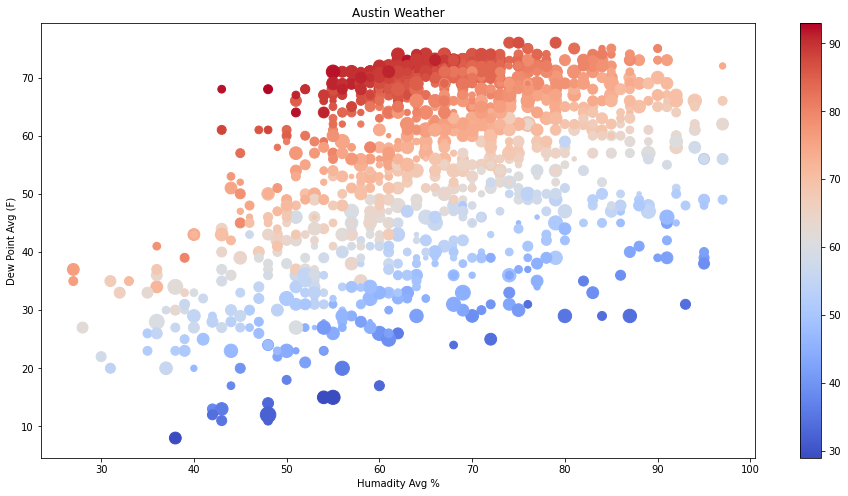

In [65]:
# visualisasi perbandingan kuantitatif scatter plot
# ket:
# colormap adalah 'coolwarm'
# berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
# berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar

fig, ax = plt.subplots(figsize=(16, 8))

mappbar = ax.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], cmap='coolwarm', c=df['TempAvgF'], s=df['WindAvgMPH']*20)

ax.set_xlabel('Humadity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')

fig.colorbar(mappbar)
plt.show()

**Insight** : berdasarkan hasil dari visualisasi data yang sudah didapatkan dengan bentuk scatter plot tersebut bisa disimpulkan bahwa tingkat kelembaban **_(Humadity Avg %)_** sangat dipengaruhi oleh titik embun **_(Dew Point Avg (F)_**). Bisa dilihat pada plot grafik tersebut, **semakin tinggi** nilai dari **kelembaban dan** juga nilai dari **titik embun**, maka hasil **cuacanya akan semakin besar**. Cuaca disini bisa dikatakan yaitu rata-rata temperatur **_(TempAvgF)_** menjadi tolak ukur apakah suatu wilayah di Austin memiliki temperatur yang tinggi atau tidak berdasarkan pengaruh dari tingkat kelembaban dan titik embun sebelumnya. Rentang nilai suatu temperatur dikatakan normal bisa dibilang pada angka **_60 derajat Fahrenheit_**, angka tertinggi bisa dibilang pada nilai lebih dari **_90 derajat Fahrenheit_** dan angka terendah pada nilai kurang dari **_40 derajat Fahrenheit_**. Kemudian, untuk ukuran pemusatan data pada setiap titik sample data dipengaruhi besar kecil ukurannya dari nilai rata-rata kecepatan angin **_(WindAvgF)_**.

---

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [66]:
!wget "https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv"

--2020-10-16 04:43:39--  https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv
Resolving blog.sanbercode.com (blog.sanbercode.com)... 45.13.133.160
Connecting to blog.sanbercode.com (blog.sanbercode.com)|45.13.133.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1355781 (1.3M) [text/csv]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.29M   735KB/s    in 1.8s    

2020-10-16 04:43:42 (735 KB/s) - ‘vgsales.csv’ saved [1355781/1355781]



In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [74]:
#code here
df_mean = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
df_mean

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

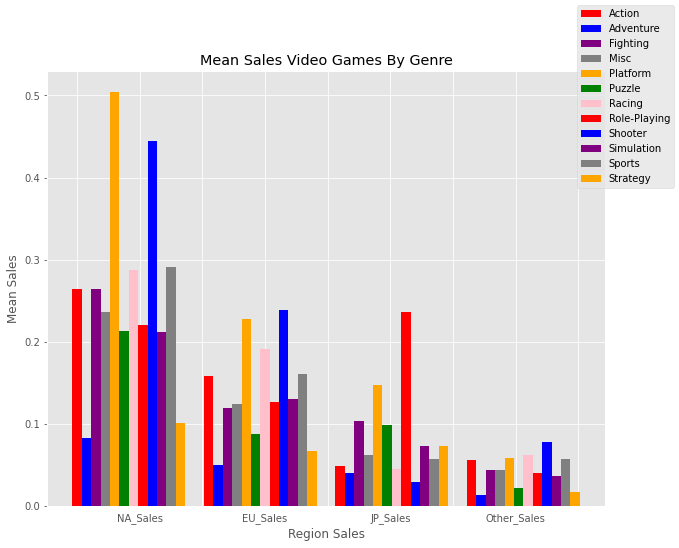

In [478]:
#code here
## buat range untuk sumbu x nya
# x = np.arange(0, 24, 24)
plt.style.use('ggplot')
x = np.array([12])

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(4):
  if i == 0:
    counter = 0
  else:
    counter += 0.6
  for j in range(12):
    width = 0.3
    y = df_mean.loc[df_mean.index[j], df_mean.columns[i]]
    if df_mean.index[j] == 'Action':
      color = 'r'
    elif df_mean.index[j] == 'Adventure':
      color = 'b'
    elif df_mean.index[j] == 'Fighting':
      color = 'purple'
    elif df_mean.index[j] == 'Misc':
      color = 'grey'
    elif df_mean.index[j] == 'Platform':
      color = 'orange'
    elif df_mean.index[j] == 'Puzzle':
      color = 'green'
    elif df_mean.index[j] == 'Racing':
      color = 'pink'
    elif df_mean.index[j] == 'Role-Playing':
      color = 'r'
    elif df_mean.index[j] == 'Shooter':
      color = 'b'
    elif df_mean.index[j] == 'Simulation':
      color = 'purple'
    elif df_mean.index[j] == 'Sports':
      color = 'grey'
    elif df_mean.index[j] == 'Strategy':
      color = 'orange'
    if i == 0:
      ax.bar(x+counter, y, width=width, label=df_mean.index[j], color=color)
    else:
      ax.bar(x+counter, y, width=width, color=color)
    counter += width

ax.set_xticklabels([0, '', 'NA_Sales', '', 'EU_Sales', '', 'JP_Sales', '', 'Other_Sales'])
ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
ax.set_title('Mean Sales Video Games By Genre')

fig.legend(loc='upper right', facecolor='inherit', frameon=True, fancybox=True)
plt.tick_params(bottom=False)
plt.show()

**Jawab**:

Insight yang bisa didapatkan dari visualisasi data tersebut dapat diketahui bahwa rata-rata penjualan **(Mean Sales)** untuk setiap negara atau **(Region Sales)** cukup beragam. Nilai tertinggi untuk rata-rata penjualan didapatkan pada region **NA_Sales** terutama untuk genre video games **_Platform_** dan **_Shooter_**. Untuk urutan kedua bisa dilihat yaitu pada region **EU_Sales**, kemudian **JP_Sales** dan terakhir **Other_Sales**.

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

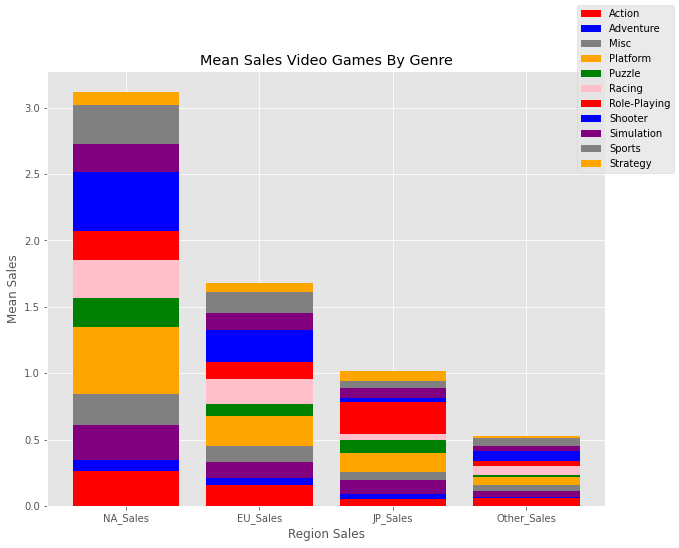

In [519]:
#code here
x_new = df_mean.columns

fig, ax = plt.subplots(figsize=(10, 8))

# Bar 1
ax.bar(x_new[0], df_mean.loc['Action', 'NA_Sales'], label='Action', color='r')
bottom = df_mean.loc['Action', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Adventure', 'NA_Sales'], bottom=bottom, label='Adventure', color='b')
bottom += df_mean.loc['Adventure', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Fighting', 'NA_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Fighting', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Misc', 'NA_Sales'], bottom=bottom, label='Misc', color='grey')
bottom += df_mean.loc['Misc', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Platform', 'NA_Sales'], bottom=bottom, label='Platform', color='orange')
bottom += df_mean.loc['Platform', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Puzzle', 'NA_Sales'], bottom=bottom, label='Puzzle', color='green')
bottom += df_mean.loc['Puzzle', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Racing', 'NA_Sales'], bottom=bottom, label='Racing', color='pink')
bottom += df_mean.loc['Racing', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Role-Playing', 'NA_Sales'], bottom=bottom, label='Role-Playing', color='r')
bottom += df_mean.loc['Role-Playing', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Shooter', 'NA_Sales'], bottom=bottom, label='Shooter', color='b')
bottom += df_mean.loc['Shooter', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Simulation', 'NA_Sales'], bottom=bottom, label='Simulation', color='purple')
bottom += df_mean.loc['Simulation', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Sports', 'NA_Sales'], bottom=bottom, label='Sports', color='grey')
bottom += df_mean.loc['Sports', 'NA_Sales']
ax.bar(x_new[0], df_mean.loc['Strategy', 'NA_Sales'], bottom=bottom, label='Strategy', color='orange')
bottom += df_mean.loc['Strategy', 'NA_Sales']

# Bar 2
bottom = 0
ax.bar(x_new[1], df_mean.loc['Action', 'EU_Sales'], color='r')
bottom = df_mean.loc['Action', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Adventure', 'EU_Sales'], bottom=bottom, color='b')
bottom += df_mean.loc['Adventure', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Fighting', 'EU_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Fighting', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Misc', 'EU_Sales'], bottom=bottom, color='grey')
bottom += df_mean.loc['Misc', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Platform', 'EU_Sales'], bottom=bottom, color='orange')
bottom += df_mean.loc['Platform', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Puzzle', 'EU_Sales'], bottom=bottom, color='green')
bottom += df_mean.loc['Puzzle', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Racing', 'EU_Sales'], bottom=bottom, color='pink')
bottom += df_mean.loc['Racing', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Role-Playing', 'EU_Sales'], bottom=bottom, color='r')
bottom += df_mean.loc['Role-Playing', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Shooter', 'EU_Sales'], bottom=bottom, color='b')
bottom += df_mean.loc['Shooter', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Simulation', 'EU_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Simulation', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Sports', 'EU_Sales'], bottom=bottom, color='grey')
bottom += df_mean.loc['Sports', 'EU_Sales']
ax.bar(x_new[1], df_mean.loc['Strategy', 'EU_Sales'], bottom=bottom, color='orange')
bottom += df_mean.loc['Strategy', 'EU_Sales']

# Bar 3
bottom = 0
ax.bar(x_new[2], df_mean.loc['Action', 'JP_Sales'], color='r')
bottom = df_mean.loc['Action', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Adventure', 'JP_Sales'], bottom=bottom, color='b')
bottom += df_mean.loc['Adventure', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Fighting', 'JP_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Fighting', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Misc', 'JP_Sales'], bottom=bottom, color='grey')
bottom += df_mean.loc['Misc', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Platform', 'JP_Sales'], bottom=bottom, color='orange')
bottom += df_mean.loc['Platform', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Puzzle', 'JP_Sales'], bottom=bottom, color='green')
bottom += df_mean.loc['Puzzle', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Racing', 'JP_Sales'], bottom=bottom, color='pink')
bottom += df_mean.loc['Racing', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Role-Playing', 'JP_Sales'], bottom=bottom, color='r')
bottom += df_mean.loc['Role-Playing', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Shooter', 'JP_Sales'], bottom=bottom, color='b')
bottom += df_mean.loc['Shooter', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Simulation', 'JP_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Simulation', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Sports', 'JP_Sales'], bottom=bottom, color='grey')
bottom += df_mean.loc['Sports', 'JP_Sales']
ax.bar(x_new[2], df_mean.loc['Strategy', 'JP_Sales'], bottom=bottom, color='orange')
bottom += df_mean.loc['Strategy', 'JP_Sales']

# Bar 4
bottom = 0
ax.bar(x_new[3], df_mean.loc['Action', 'Other_Sales'], color='r')
bottom = df_mean.loc['Action', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Adventure', 'Other_Sales'], bottom=bottom, color='b')
bottom += df_mean.loc['Adventure', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Fighting', 'Other_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Fighting', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Misc', 'Other_Sales'], bottom=bottom, color='grey')
bottom += df_mean.loc['Misc', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Platform', 'Other_Sales'], bottom=bottom, color='orange')
bottom += df_mean.loc['Platform', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Puzzle', 'Other_Sales'], bottom=bottom, color='green')
bottom += df_mean.loc['Puzzle', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Racing', 'Other_Sales'], bottom=bottom, color='pink')
bottom += df_mean.loc['Racing', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Role-Playing', 'Other_Sales'], bottom=bottom, color='r')
bottom += df_mean.loc['Role-Playing', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Shooter', 'Other_Sales'], bottom=bottom, color='b')
bottom += df_mean.loc['Shooter', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Simulation', 'Other_Sales'], bottom=bottom, color='purple')
bottom += df_mean.loc['Simulation', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Sports', 'Other_Sales'], bottom=bottom, color='grey')
bottom += df_mean.loc['Sports', 'Other_Sales']
ax.bar(x_new[3], df_mean.loc['Strategy', 'Other_Sales'], bottom=bottom, color='orange')
bottom += df_mean.loc['Strategy', 'Other_Sales']

ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
ax.set_title('Mean Sales Video Games By Genre')

fig.legend(loc='upper right', facecolor='inherit', frameon=True, fancybox=True)

plt.show()

**Jawab**:

Insight yang bisa didapatkan dapat dikatakan sama seperti pada visualisasi pada bar chart sebelumnya, hanya saja untuk yang sekarang bar chart berbentuk stacked bar graph. Simpulan yang bisa didapatkan dari visualisasi bar chart tersebut dapat diketahui bahwa rata-rata penjualan **(Mean Sales)** untuk setiap negara atau **(Region Sales)** cukup beragam. Nilai tertinggi untuk rata-rata penjualan didapatkan pada region **NA_Sales** terutama untuk genre video games **_Platform_** dan **_Shooter_**. Untuk urutan kedua bisa dilihat yaitu pada region **EU_Sales**, kemudian **JP_Sales** dan terakhir **Other_Sales**.

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)